# DIABETES PREDICTION

**Problem Statement**<br>
This project aims to model the progression of diabetes using the available independent variables. The model will help healthcare professionals understand how different factors influence the progression of diabetes and potentially aid in designing better treatment plans and preventive measures. The model will provide insights into the dynamics of diabetes progression in patients.<br><br>
**Dataset**<br>
Use the `Diabetes` dataset available in the `sklearn` library.

<br>

# IMPORTING GENERAL LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

<br>

# IMPORTING DATASET

In [2]:
from sklearn.datasets import load_diabetes

diabetes_ds = load_diabetes()
data = pd.DataFrame(diabetes_ds.data, columns=diabetes_ds.feature_names)
target = pd.DataFrame(diabetes_ds.target, columns=['target'])
df=pd.merge(data, target, right_index=True, left_index=True)

<br>

# DATASET INFORMATION

In [3]:
#dataset description
print(colored("DESCRIPTION OF DIABETES DATASET\n_______________________________\n", "red"))
print(diabetes_ds.DESCR)

DESCRIPTION OF DIABETES DATASET
_______________________________

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blo

In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
#renaming features and target
df.rename(columns={'s1':'tc', 's2':'ldl', 's3':'hdl', 's4':'tch', 's5':'ltg', 's6':'glu'}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   tc      442 non-null    float64
 5   ldl     442 non-null    float64
 6   hdl     442 non-null    float64
 7   tch     442 non-null    float64
 8   ltg     442 non-null    float64
 9   glu     442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [7]:
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
tc        0
ldl       0
hdl       0
tch       0
ltg       0
glu       0
target    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
tc,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
ldl,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
hdl,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
tch,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
ltg,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
glu,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


<h2 style="color: #239b56 ">There are no null or duplicate entries. The independent features appear to be already labelled and scaled. No need for scaling.</h2>

<br>

# DATA EXPLORATION

In [10]:
#creating function to plot histogram and box plot after transformation
sns.set_theme(palette='flare')
def plot_columns(feature):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    #histogram
    sns.histplot(df[feature], kde=True, ax=axs[0])
    axs[0].set_title(f'{feature} - Histogram')
    
    #boxplot
    sns.boxplot(y=df[feature], ax=axs[1]) 
    axs[1].set_title(f'{feature} - Box Plot')
    
    plt.show()

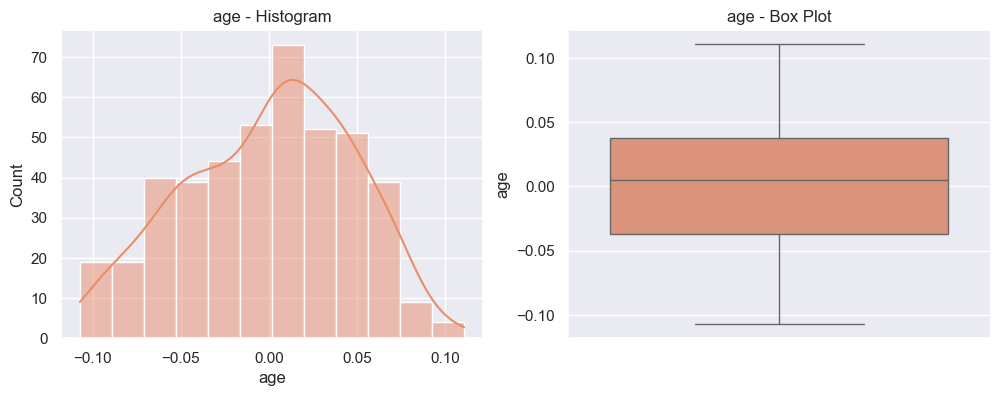

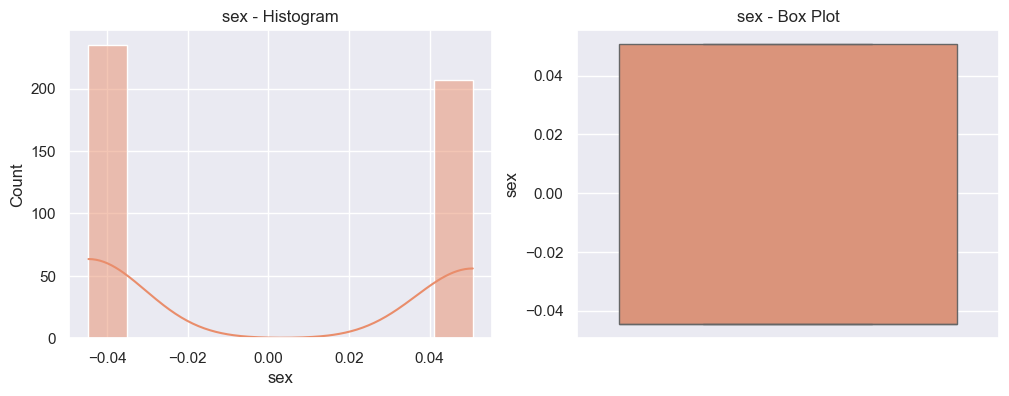

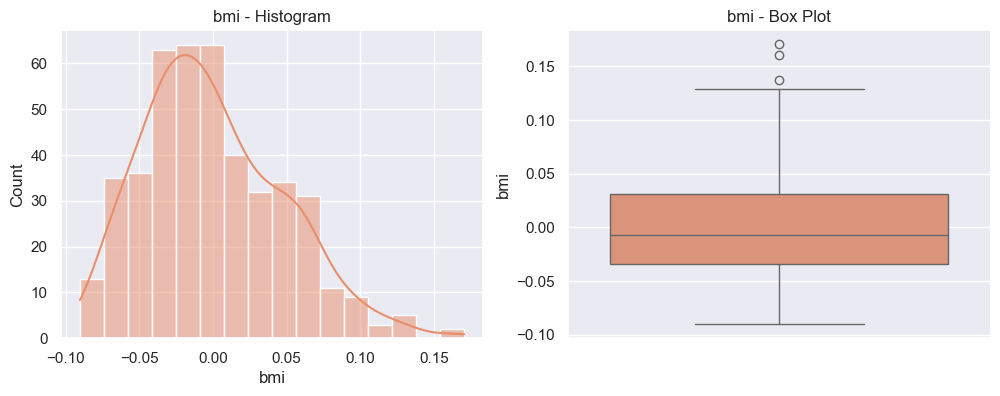

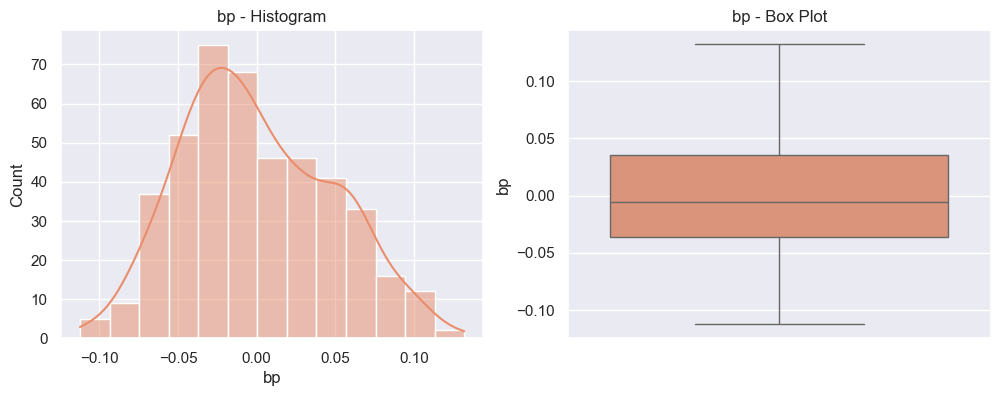

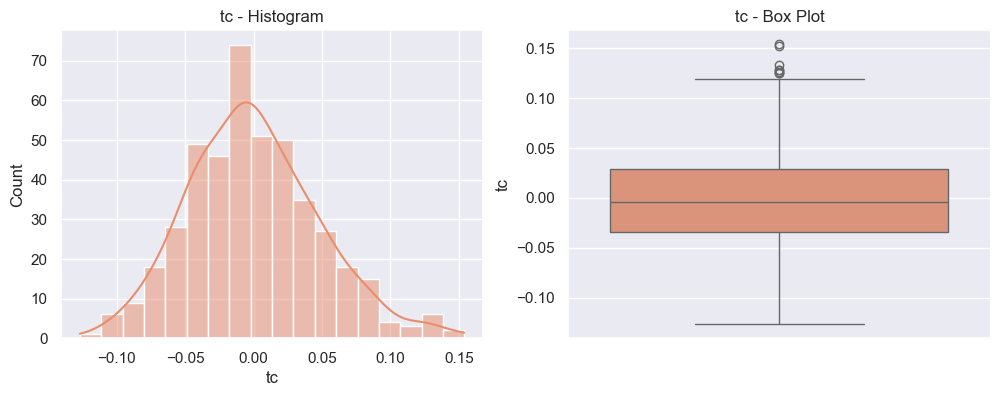

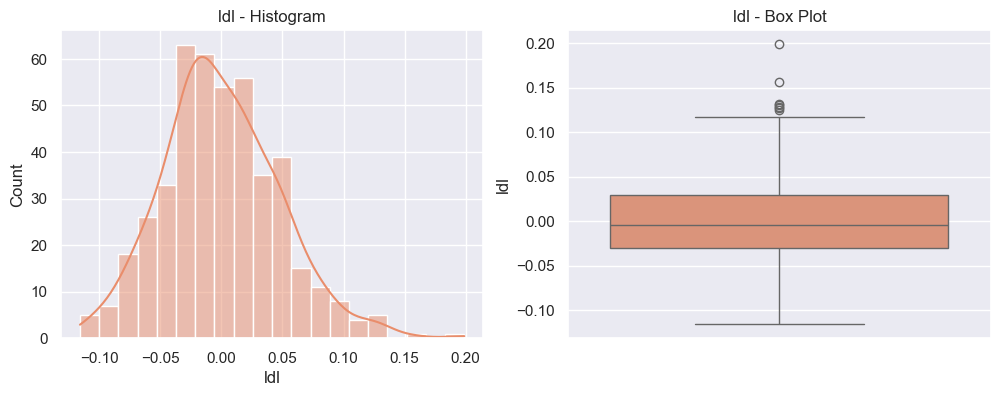

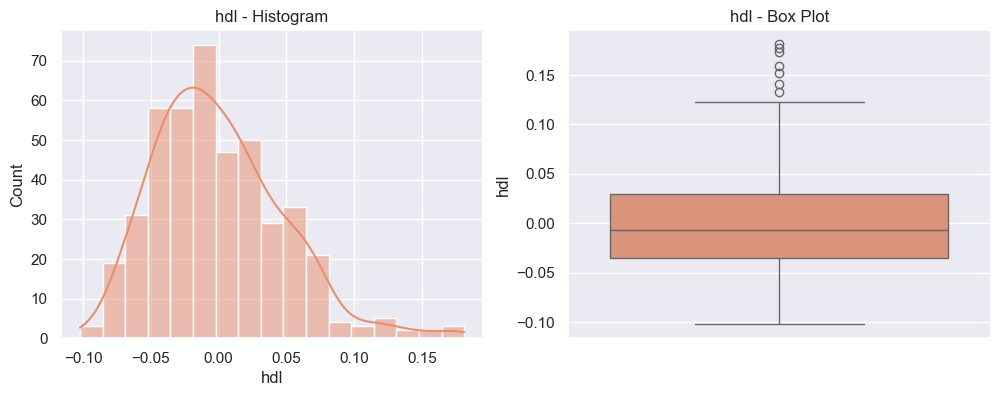

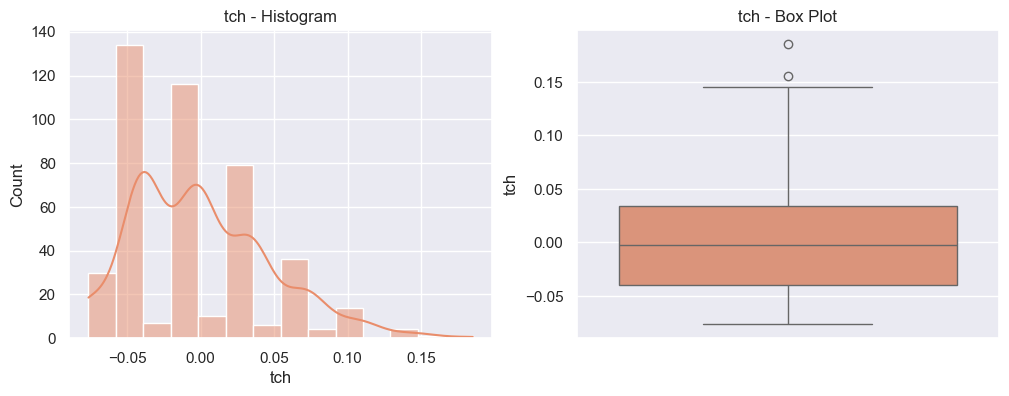

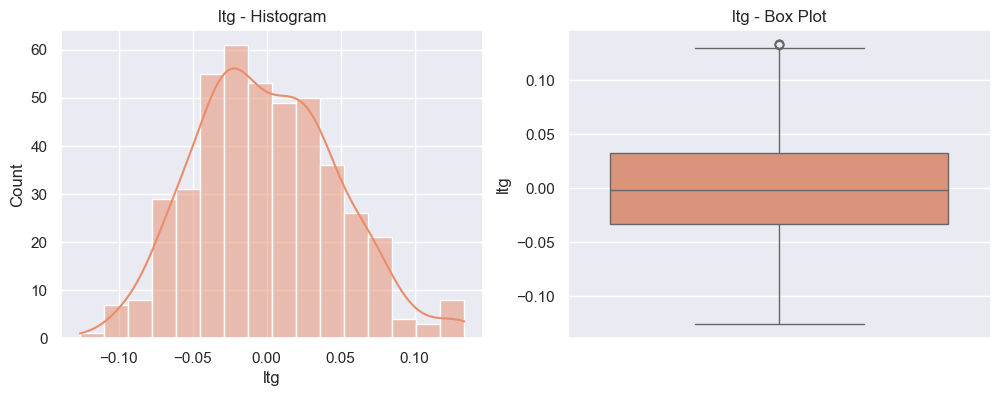

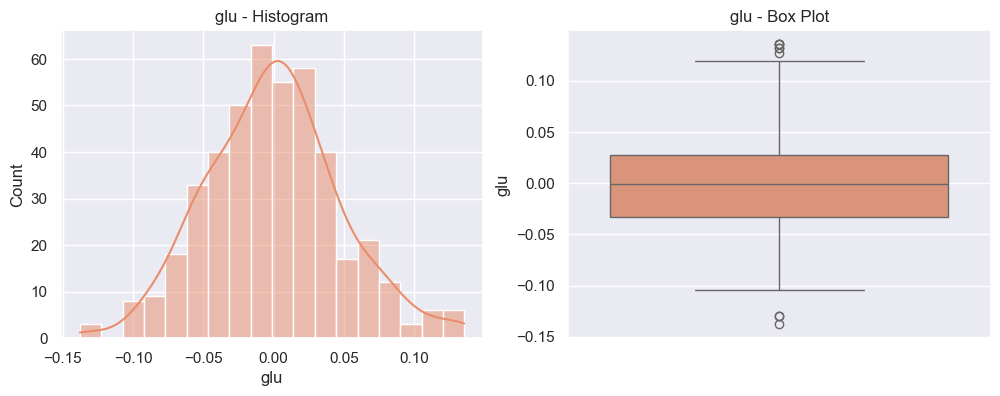

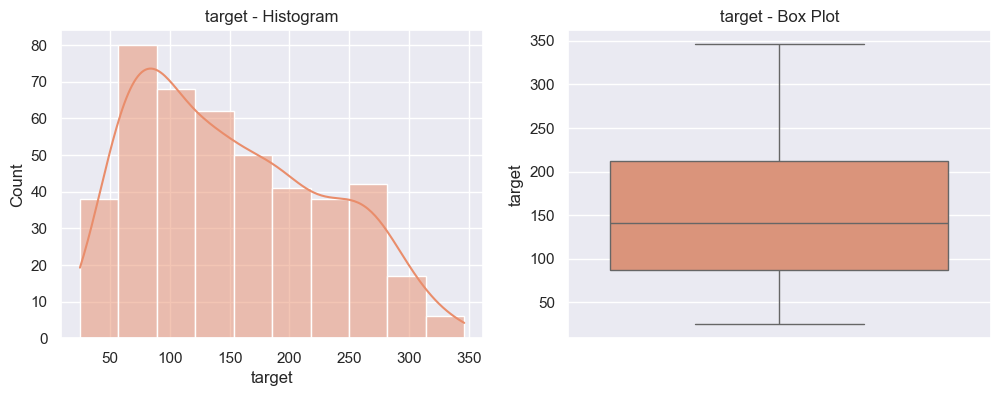

In [11]:
for col in df.columns:
    plot_columns(col)

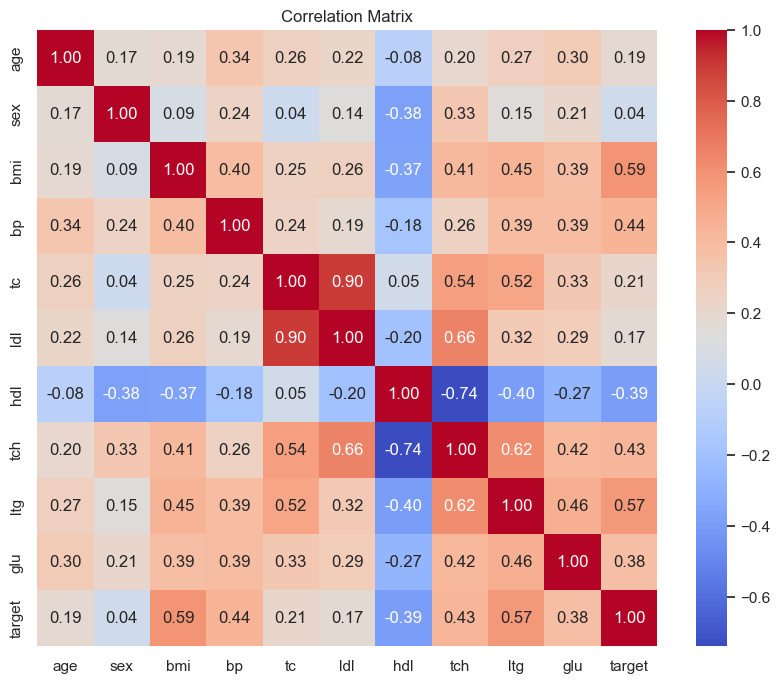

In [12]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [13]:
#cols with > 0.25 absolute correlation
cols_to_plot = ['bmi', 'bp', 'hdl', 'tch', 'ltg', 'glu', 'target']

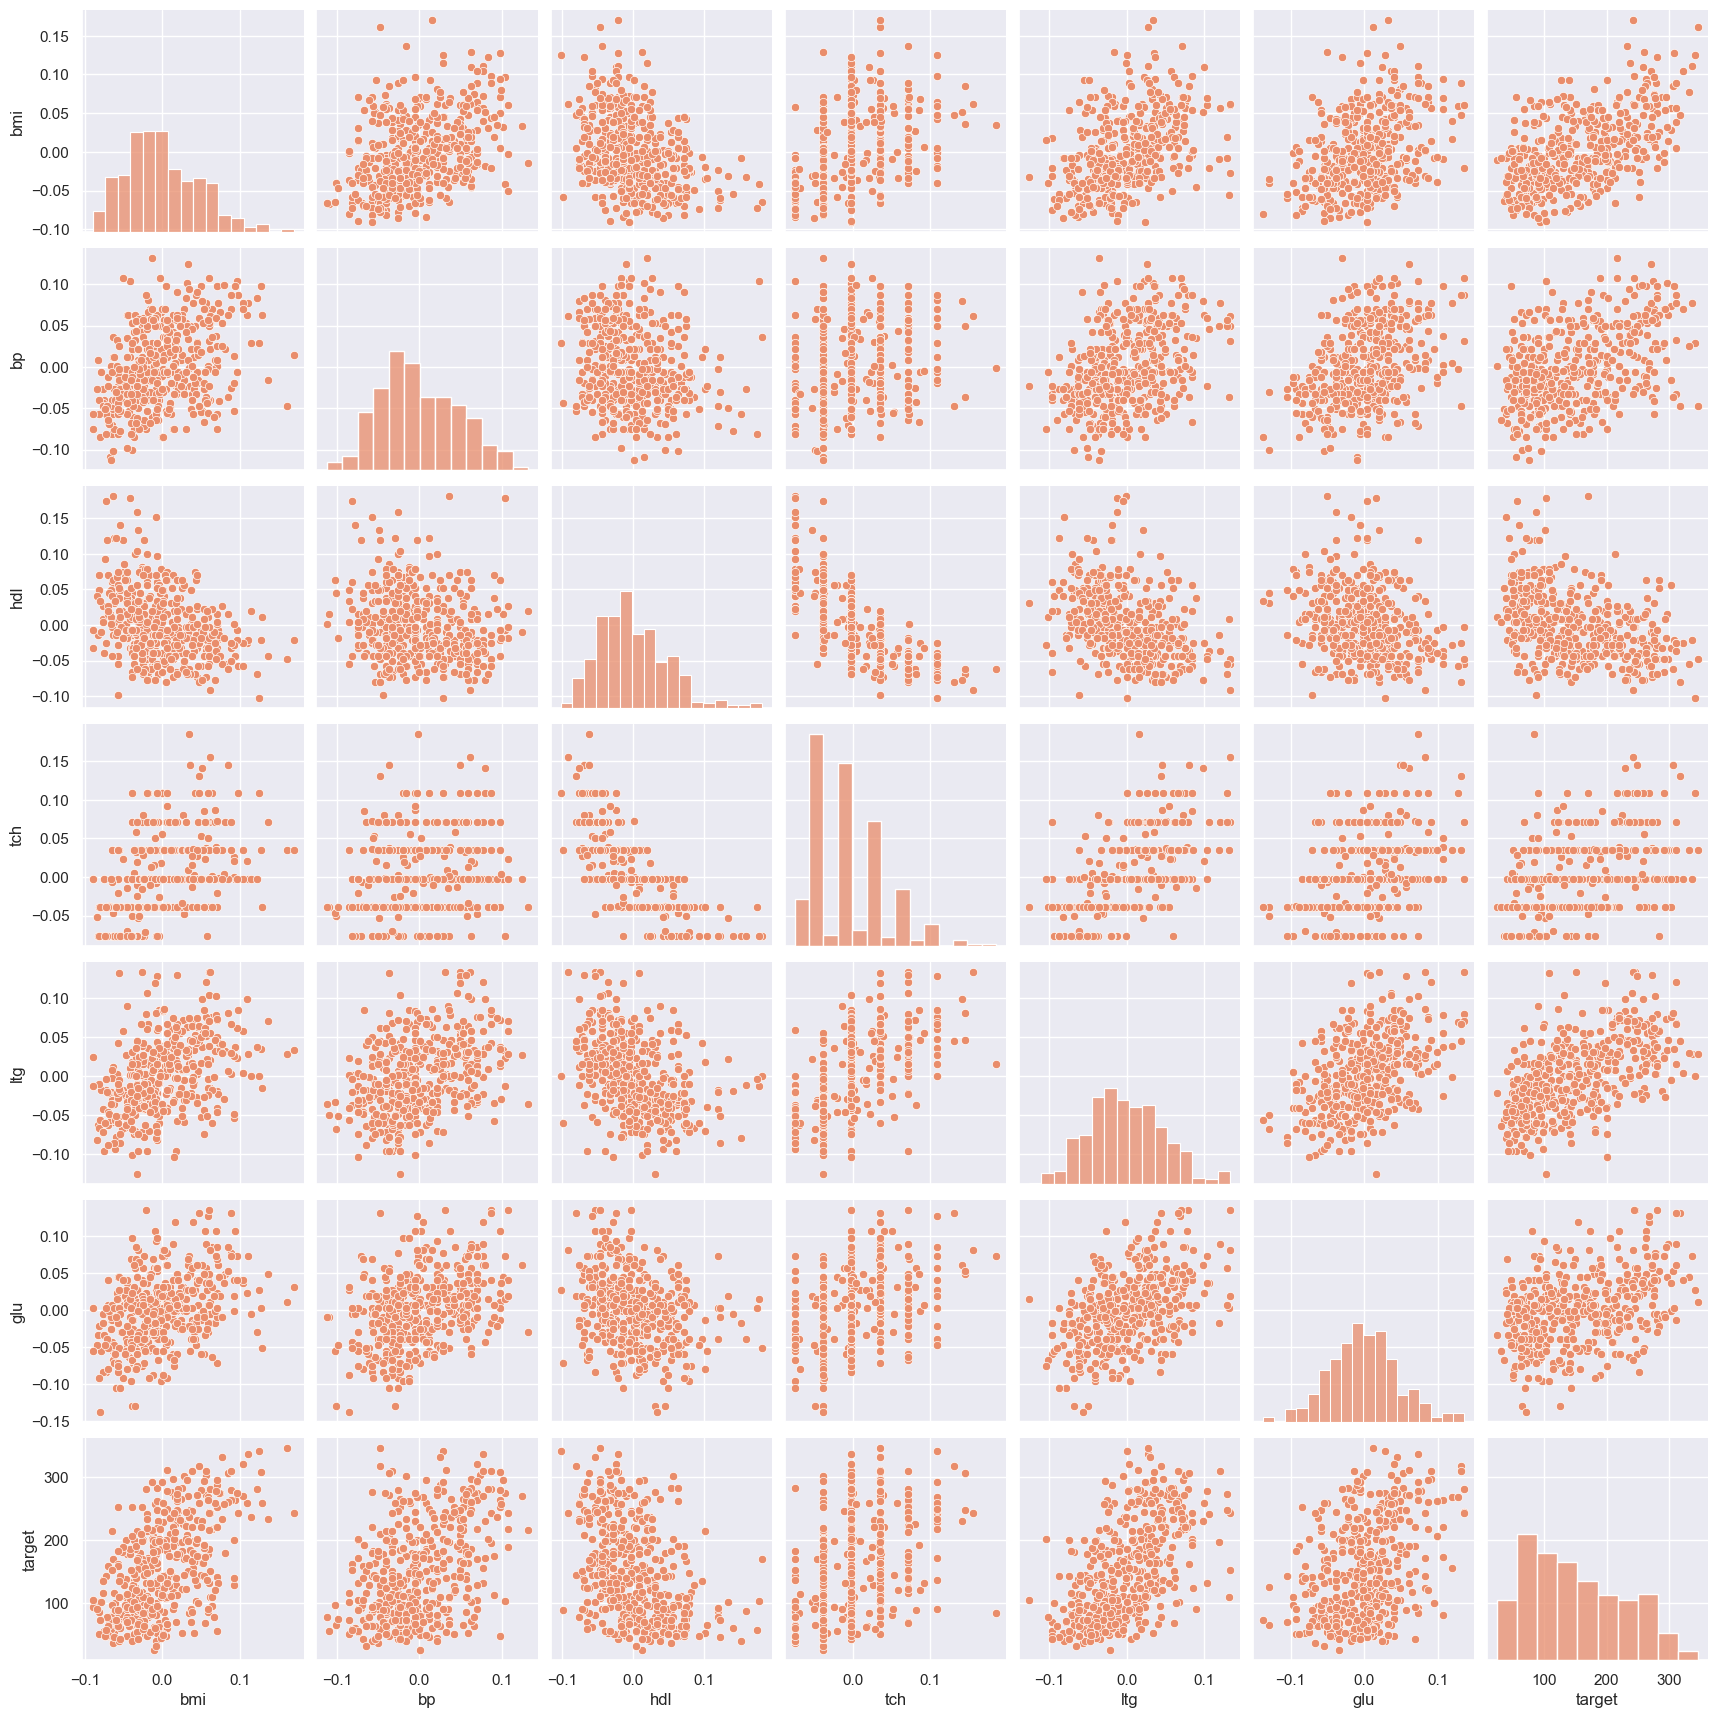

In [14]:
sns.pairplot(df[cols_to_plot])

**Positive Correlations:**                
    **Strong positive correlations:**                 
        - tc and IPI have a very strong positive correlation of 0.90, indicating that they are highly correlated.               
        - target and glu have a strong positive correlation of 0.57, suggesting that higher glucose levels are associated with higher blood sugar levels.                      
        - tch and hdl have a strong negative correlation of -0.74, indicating that higher levels of total cholesterol are associated with lower levels of HDL cholesterol.                        
    **Moderate positive correlations:**      
       - bmi, bp, tc, hdl, tch, Itg, and glu have moderate positive correlations with target, suggesting that these features are associated with blood sugar levels to some extent.         

**Negative Correlations:**           
    **Strong negative correlations:**
        - hdl and tch have a strong negative correlation of -0.74, as mentioned earlier.            
        - age and hdl have a moderate negative correlation of -0.38, suggesting that older age might be associated with lower HDL cholesterol levels.           

**Other Observations:**            
    - Sex and target: There is a weak positive correlation (0.04) between sex and target, suggesting that sex might have a slight influence on blood sugar levels. However, this correlation is not very strong.         
    - Age and target: There is a weak negative correlation (-0.19) between age and target, suggesting that older age might be slightly associated with lower blood sugar levels. However, this correlation is also not very strong.

<h2 style="color: #239b56 ">BMI, BP, LTG and GLU exibits high correlation with target</h2>

<br>

# SPLITTING TRAINING AND TEST SETS

In [15]:
X = df.drop(columns=['target'], axis=1)
y = df[['target']]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<br>

# BUILDING ANN MODEL

In [18]:
#pip install tensorflow

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],))) #64 neurons
model.add(Dense(32, activation='relu')) #hidden layer - 32 neurons
model.add(Dense(1, activation='linear')) #output layer

C:\Users\abhir\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['r2_score'])

<br>

<br>

# TRAINING ANN MODEL

In [21]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 29355.9082 - r2_score: -3.8957
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29930.7949 - r2_score: -3.9840
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30932.7344 - r2_score: -3.8821
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30672.2070 - r2_score: -3.9445
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29410.9570 - r2_score: -3.67104
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29552.3535 - r2_score: -4.0609
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29139.0020 - r2_score: -3.5995
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28196.0996 - r2_score: -3.5114
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27793.8965 - r2_score: -3.3110
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27885.2383 - r2_score: -3.8826
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25902.5898 - r2_score: -3.3300 
Epoch 

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3737.1047 - r2_score: 0.4202 
Epoch 68/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3245.4526 - r2_score: 0.4792
Epoch 69/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3455.9194 - r2_score: 0.4380
Epoch 70/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3191.9043 - r2_score: 0.4841
Epoch 71/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3269.7478 - r2_score: 0.4298
Epoch 72/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3323.8389 - r2_score: 0.4389
Epoch 73/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3288.6682 - r2_score: 0.4451
Epoch 74/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3193.3391 - r2_score: 0.4522
Epoch 75/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3305.4253 - r2_score: 0.4845
Epoch 76/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3375.7793 - r2_score: 0.4573
Epoch 77/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3189.5220 - r2_score: 0.4909
Epoch 78/100
12/12 ━━━━━━━━━━━━━━

<br>

# EVALUATING THE MODEL

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [23]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2933.635366793386
R-squared: 0.44629079987851283


<h2 style="color: #239b56 ">R2 score of model is significantly low and MSE is high</h2>

<br>

# IMPROVING THE MODEL

In [33]:
#Model - 2

In [24]:
model_2 = Sequential()
model_2.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, activation='linear'))

C:\Users\abhir\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['r2_score'])

In [31]:
model_2.fit(X_train, y_train, epochs=150, batch_size=32)

Epoch 1/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2496.4248 - r2_score: 0.5771
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2766.3828 - r2_score: 0.5180
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3019.1895 - r2_score: 0.5101
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3001.3779 - r2_score: 0.5023 
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3093.4429 - r2_score: 0.4758
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2967.3044 - r2_score: 0.4992
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2922.1511 - r2_score: 0.5221 
Epoch 8/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2583.1550 - r2_score: 0.5788
Epoch 9/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2876.4380 - r2_score: 0.5377
Epoch 10/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2787.8025 - r2_score: 0.4648
Epoch 11/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2818.6602 - r2_score: 0.5566
Epoch 12/150
12/12 ━━━━━━━━━

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2772.0798 - r2_score: 0.5656 87
Epoch 68/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2688.4629 - r2_score: 0.5340 
Epoch 69/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2846.0496 - r2_score: 0.5507
Epoch 70/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2881.1704 - r2_score: 0.5130
Epoch 71/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2832.5906 - r2_score: 0.5145
Epoch 72/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2707.5210 - r2_score: 0.5596
Epoch 73/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2576.0034 - r2_score: 0.5691  
Epoch 74/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2959.6934 - r2_score: 0.5261
Epoch 75/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2771.1191 - r2_score: 0.5082 
Epoch 76/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2982.2046 - r2_score: 0.5215
Epoch 77/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2917.8750 - r2_score: 0.5215
Epoch 78/150
12/12 ━━━━━━━━

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2673.5344 - r2_score: 0.5356
Epoch 134/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3091.2576 - r2_score: 0.5114
Epoch 135/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2835.4473 - r2_score: 0.5337
Epoch 136/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2749.1978 - r2_score: 0.5502 
Epoch 137/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2725.5095 - r2_score: 0.5482
Epoch 138/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2796.8928 - r2_score: 0.5547
Epoch 139/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2533.4817 - r2_score: 0.5934
Epoch 140/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2887.8020 - r2_score: 0.5349
Epoch 141/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2668.8413 - r2_score: 0.5496 
Epoch 142/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2754.7434 - r2_score: 0.5508 9
Epoch 143/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2757.9370 - r2_score: 0.5548
Epoch 144/150
12/12 

In [32]:
y_pred2 = model_2.predict(X_test)
mse_2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print("Improved Model MSE:", mse_2)
print("Improved Model R-squared:", r2_2)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Improved Model MSE: 2700.263303189938
Improved Model R-squared: 0.49033862536195405


<br>

### for model improvemet we can experiment with 
- Number of hidden layers
- Number of neurons in hidden layer
- Activation functions
- Hyperparameters (learning rate, number of epochs etc.)

which can be done in future